<a href="https://colab.research.google.com/github/ttlemans/dataframes/blob/main/Actividad_2_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import pathlib

from pandas import read_csv

from pandas import read_csv 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import numpy as np 
import pandas as pd 
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.metrics import accuracy_score 
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

url='https://raw.githubusercontent.com/ttlemans/dataframes/main/Second_hand_Cars.csv'

dataset=pd.read_csv(url)
dataset.tail()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0
999,1000,590105,779743,5,67295,4,2,8,199,99,96,414938.5


In [259]:
dataset.isna().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [260]:
train_dataset = dataset.sample(frac=0.75,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

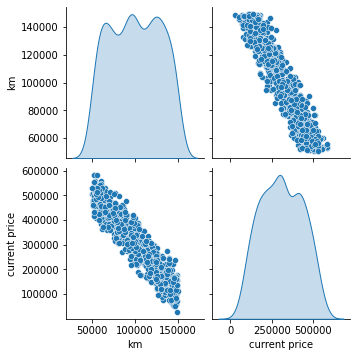

In [257]:
sns.pairplot(train_dataset[[ "km", "current price"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop('current price')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
v.id,750.0,506.036000,287.791837,1.0,260.5,502.5,753.75,1000.0
on road old,750.0,601276.238667,57951.175234,500265.0,548572.5,601450.5,650024.25,699570.0
on road now,750.0,799042.930667,56767.201109,700018.0,753252.5,797739.0,847573.75,899797.0
years,750.0,4.558667,1.712640,2.0,3.0,5.0,6.00,7.0
km,750.0,100259.432000,29005.000271,50460.0,74733.5,99671.5,125054.00,149654.0
rating,750.0,3.004000,1.416566,1.0,2.0,3.0,4.00,5.0
condition,750.0,5.597333,2.830879,1.0,3.0,6.0,8.00,10.0
economy,750.0,11.602667,2.221870,8.0,10.0,12.0,13.00,15.0
top speed,750.0,166.578667,19.418477,135.0,150.0,165.5,184.00,200.0
hp,750.0,84.605333,20.729203,50.0,67.0,84.0,102.00,120.0


In [ ]:
train_labels = train_dataset.pop('current price')
test_labels = test_dataset.pop('current price')

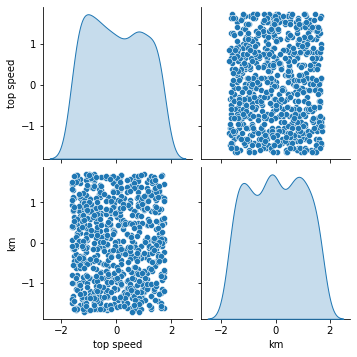

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


sns.pairplot(normed_train_data[["top speed", "km"]], diag_kind="kde")

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_224 (Dense)            (None, 64)                768       
_________________________________________________________________
dense_225 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_226 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_227 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_228 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_229 (Dense)            (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.02592564],
       [-0.0710271 ],
       [-0.07996739],
       [-0.11054023],
       [ 0.08168439],
       [-0.00712167],
       [-0.10422748],
       [-0.04229282],
       [-0.02104556],
       [-0.19497347]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,13147707.0,2628.681396,13147707.0,39918872.0,5111.960449,39918872.0,995
996,9699139.0,2258.531982,9699139.0,50840012.0,6318.180176,50840012.0,996
997,15975859.0,3093.877441,15975859.0,37839736.0,5284.649414,37839736.0,997
998,14396863.0,3084.566162,14396863.0,27757924.0,3983.395020,27757924.0,998
999,12334643.0,2801.719238,12334643.0,42359488.0,5609.134277,42359488.0,999


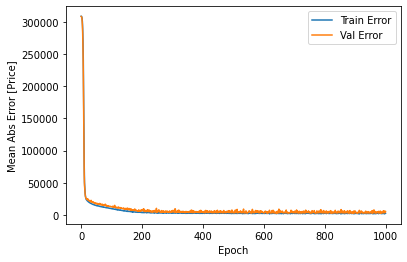

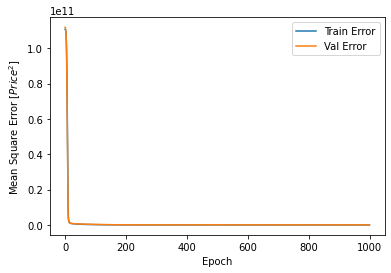

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,25000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,3000000000])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
............................

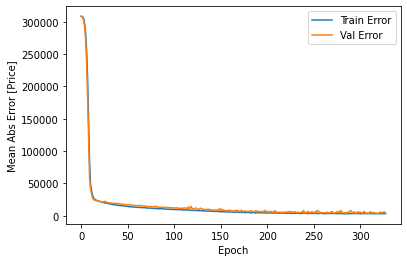

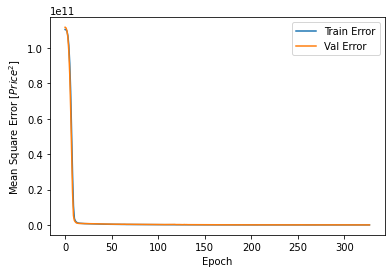

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Price".format(mae))

8/8 - 0s - loss: 26129130.0000 - mae: 3780.1487 - mse: 26129130.0000
Testing set Mean Abs Error: 3780.15 Price


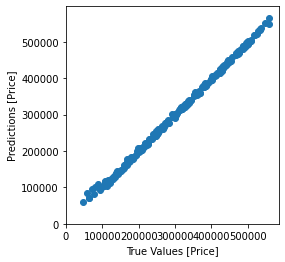

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
print(test_predictions)

[207881.31  267813.62  199176.39  144216.9   519167.03  383010.56
 178074.38  179601.25  129503.77  447973.53  314610.97  436866.2
 318773.34  147582.47  450826.88  458700.75  290584.9   202103.22
 468964.94  425361.5   319852.78  336984.12  161742.88  350264.66
 244844.25  301680.97  278242.66  353321.47  165923.33  487375.97
 435631.44  232811.27  245975.81  311640.66  480701.66  285483.03
 327971.06  365890.5   255653.    362209.03  182678.97  121306.89
 218783.97  234321.89  124136.84  200097.33  201962.69  447831.66
 220739.34  389527.22  220543.78  436991.2   202005.39  257206.72
 184871.23   84923.19  410064.6   212199.    329446.84  163042.83
 533427.8   151710.31  323978.78  145191.62  481030.03  376902.53
 471581.34  265602.5   477498.72  408970.6   210121.27  441279.28
 328163.88  316046.03  550765.6   176749.25  329723.16  210788.9
 245122.47  434559.84  302902.78  499361.1   294292.78  281055.6
  69692.9   215180.69  394258.62  116174.95  487328.16  188188.72
 280261.7   4